In [32]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [33]:
df = pd.read_csv ("/Users/mohadeseh/Documents/me/session8/data_mining/FDM_Project_dataset-99-2/divar_dataset/divar_posts_dataset.csv")  

In [34]:
df.describe()

,Unnamed: 0,id,image_count,mileage,price
count,947635.000000,9.476350e+05,947635.000000,120451.000000,9.476350e+05
mean,473817.000000,3.363293e+13,1.785852,100862.291944,3.398462e+06
std,273558.805509,1.944109e+13,1.127712,98368.470916,1.371741e+07
min,0.000000,5.950553e+07,0.000000,0.000000,-1.000000e+00
25%,236908.500000,1.677974e+13,1.000000,19000.000000,3.000000e+04
50%,473817.000000,3.362242e+13,2.000000,75000.000000,1.500000e+05
75%,710725.500000,5.049560e+13,2.000000,160000.000000,6.000000e+05
max,947634.000000,6.728036e+13,16.000000,500000.000000,4.000000e+08


In [35]:
df.median()

Unnamed: 0         4.738170e+05
archive_by_user    1.000000e+00
id                 3.362242e+13
image_count        2.000000e+00
mileage            7.500000e+04
price              1.500000e+05
dtype: float64

In [36]:
df.mode()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,True,پراید صندوق‌دار::Pride,for-the-home,furniture-and-home-decore,light,Tehran,Saturday 12PM,کاملا سالم,59505527,1.0,200000.0,mobile,-1.0,بوفه,women,1393
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156800403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213891684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228052087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353995694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,947630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67280003282270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947631,947631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67280103975424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947632,947632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67280146336314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947633,947633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67280347210295,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
stats.mode(df.loc[:,['id']])

ModeResult(mode=array([[59505527]]), count=array([[1]]))

In [38]:
df.dtypes

Unnamed: 0           int64
archive_by_user       bool
brand               object
cat1                object
cat2                object
cat3                object
city                object
created_at          object
desc                object
id                   int64
image_count          int64
mileage            float64
platform            object
price                int64
title               object
type                object
year                object
dtype: object

In [39]:
Q1 = df.loc[:,['id']].quantile(0.25)
Q3 = df.loc[:,['id']].quantile(0.75)
IQR = Q3 - Q1
outlier_above= (1.5*IQR)+Q3
outlier_bottom= Q1-(1.5*IQR)
outlier_bottom[0]

-33794059581979.0

In [40]:
select = df['id'] < outlier_bottom[0]
df.loc[select,:]

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year


In [41]:
select = df['id'] > outlier_above[0]
df.loc[select,:]

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year


In [42]:
Q1_price = df.loc[:,['price']].quantile(0.25)
Q3_price = df.loc[:,['price']].quantile(0.75)
IQR_price = Q3_price - Q1_price
outlier_price_above= (1.5 * IQR_price) + Q3_price
outlier_price_bottom= Q1_price - (1.5 * IQR_price)
outlier_price_bottom[0]

-825000.0

In [43]:
select = df['price'] < outlier_price_bottom[0]
df.loc[select,:]

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year


In [44]:
select = df['price'] > outlier_price_above[0]
# select
df.loc[select,:]

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
18,18,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Karaj,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,51728781836074,0,290000.0,web,8500000,پژو مدل 81 مشکی,NaN,1381
22,22,False,نیسان::Nissan,vehicles,cars,light,Tehran,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,26591305369165,3,175000.0,mobile,19500000,پاترول 2در,NaN,1372
36,36,False,سمند::Samand,vehicles,cars,light,Tehran,Thursday 07AM,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,35066474998268,4,80000.0,web,23900000,سمند دوگانه کارخانه,NaN,1391
38,38,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Tehran,Thursday 08AM,بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم,20806323919288,3,125000.0,mobile,8500000,پژو405 مدل84,NaN,1384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947602,947602,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Isfahan,Tuesday 05PM,مدل 84 تمیز. بدون رنگ. سیستم صوتی. رینگ و لاست...,36679901713761,3,140000.0,mobile,11000000,پراید مدل 84 بدون رنگ,NaN,1384
947612,947612,True,NaN,vehicles,cars,heavy,Tehran,Wednesday 03PM,بادسان فوق بیرنگ سفید رنگ بیمه تابرج 3.96 تخفی...,21866530196097,2,NaN,mobile,48000000,بادسان 8b14 مدل83,NaN,NaN
947625,947625,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Karaj,Thursday 03PM,سند۲ برگ،بیمه تا برج$NUMتخفیفات بیمه 15 سال،مع...,30197850752025,4,123000.0,mobile,6900000,پراید 79 بسیار سالم,NaN,1379
947628,947628,True,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Thursday 05PM,با دوسال ضمانت تشکر از دیوار,38646519610598,5,NaN,mobile,2200000,تولید کننده,NaN,NaN


In [45]:
Q1_imgCount = df.loc[:,['image_count']].quantile(0.25)
Q3_imgCount = df.loc[:,['image_count']].quantile(0.75)
IQR_imgCount = Q3_imgCount - Q1_imgCount
outlier_imgCount_above= (1.5 * IQR_imgCount) + Q3_imgCount
outlier_imgCount_bottom= Q1_imgCount - (1.5 * IQR_imgCount)
outlier_imgCount_bottom[0]

-0.5

In [46]:
select3 = df['image_count'] < outlier_imgCount_bottom[0]
df.loc[select3,:]

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year


In [47]:
select3 = df['image_count'] > outlier_imgCount_above[0]
df.loc[select3,:]

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
5,5,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 09PM,بسیارتمیزوسالم وچوب راش فقط به علت جابه جایی و...,48029048440635,4,NaN,mobile,1000000,مبل استیل,NaN,NaN
12,12,False,NaN,personal,childrens-clothing-and-shoe,NaN,Karaj,Wednesday 09AM,لباس های دخترانه از3تا9سال.فقط پیراهن قرمز به ...,21912367534021,4,NaN,mobile,30000,لباس های دخترانه 2تا9ساله,girls,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947546,947546,True,NaN,for-the-home,furniture-and-home-decore,beds-bedroom,Karaj,Saturday 01PM,روتختی جنس دوخت ترک نونونو اصلا استفاده نشده,4714564630668,4,NaN,mobile,200000,روتختی ترک نونو,NaN,NaN
947578,947578,True,NaN,for-the-home,furniture-and-home-decore,tables-and-chairs,Tehran,Monday 11AM,میز غدا خوری 8 نفره تمیز و سالم \nرویه پارچه ...,43005258242240,4,NaN,mobile,1200000,میز نهار خوری 8 نفره,NaN,NaN
947614,947614,True,NaN,vehicles,cars,heavy,Isfahan,Wednesday 06PM,باسلام .تراکتورازصفری دست خودم بوده.سالم.ودارا...,44067752978166,4,NaN,mobile,-1,تراکتورگلدونی ۲۳۸ایتالیا,NaN,NaN
947625,947625,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Karaj,Thursday 03PM,سند۲ برگ،بیمه تا برج$NUMتخفیفات بیمه 15 سال،مع...,30197850752025,4,123000.0,mobile,6900000,پراید 79 بسیار سالم,NaN,1379


In [48]:
Q1_mileage = df.loc[:,['mileage']].quantile(0.25)
Q3_mileage = df.loc[:,['mileage']].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
outlier_mileage_above = (1.5 * IQR_mileage) + Q3_mileage
outlier_mileage_bottom = Q1_mileage - (1.5 * IQR_mileage)
outlier_mileage_bottom[0]

-192500.0

In [49]:
select4 = df['mileage'] < outlier_mileage_bottom[0]
df.loc[select4,:]

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year


In [50]:
select4 = df['mileage'] > outlier_mileage_above[0]
df.loc[select4,:]

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
270,270,False,وانت,vehicles,cars,light,Tehran,Sunday 03PM,گاز سوز دارای سه سال تخفیف بیمه لاستیک 75درصد...,7711513580902,0,450000.0,mobile,13100000,وانت نیسان گازسوز,NaN,1383
352,352,False,سایر,vehicles,cars,light,Tehran,Thursday 05AM,فنی سالم . مدل 86,16547724198274,0,440000.0,web,22000000,ون دلیکا مدا 86,NaN,1386
441,441,False,وانت,vehicles,cars,light,Karaj,Saturday 06PM,موتوروگیربکس ودف سالم کابین عقب ازسه طرف باز م...,5045335444898,4,380000.0,mobile,18000000,میتسوبیشی دوکابین,NaN,1371
744,744,False,پژو ۲۰۶‍::Peugeot 206,vehicles,cars,light,Karaj,Monday 11AM,پژو ۲۰۶ مدل ۸۲ تیپ ۲\nرنگ یشمی متالیک\nجلو و ...,26675716365250,4,400000.0,mobile,-1,پژو ۲۰۶ تیپ ۲,NaN,1382
772,772,False,نیسان::Nissan,vehicles,cars,light,Mashhad,Monday 08PM,دوگانه لاستیک نوکولر وهیدرلیک سالم تودوزی فابر...,56938769532290,1,380000.0,mobile,17500000,پاترول6سیلند4درب,NaN,1371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943614,943614,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Tehran,Sunday 07AM,3 تیکه رنگ موتور به شرط جلو و عقب پلمپ تازه مو...,14974280737779,0,480000.0,mobile,9800000,مدل 85 فنی سالم,NaN,1385
943739,943739,False,سمند::Samand,vehicles,cars,light,Ahvaz,Tuesday 08PM,این سمند تاکسی ابادانه مدل 84 اسقاطی میباشد وا...,11892343125434,1,400000.0,mobile,-1,سمند تاکسی اسقاطی,NaN,1384
945078,945078,False,پژو روآ / آر‌دی::RD/ROA,vehicles,cars,light,Shiraz,Thursday 09AM,سلام مدل ۸۸ تمام فابریک یک درشو خودم پالیش کرد...,14324195865949,1,400000.0,mobile,12000000,پژو روآ اسپورت تمام فابریک,NaN,1388
945349,945349,False,پژو روآ / آر‌دی::RD/ROA,vehicles,cars,light,Karaj,Tuesday 12PM,فوری فوری لطفأ خریدار واقعی تماس بگیرد تشکر وی...,58176222307961,0,420000.0,mobile,-1,آردی سفید مدل80,NaN,1380


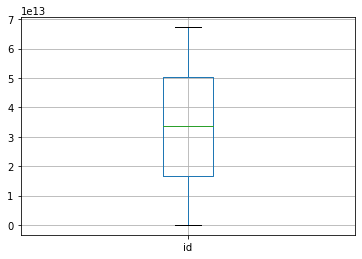

In [51]:
ax = df.loc[:,['id']].boxplot()

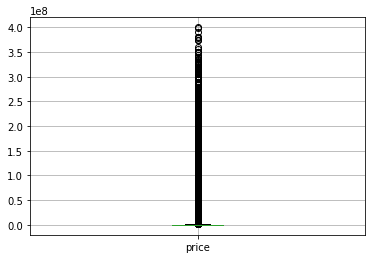

In [52]:
ax = df.loc[:,['price']].boxplot()

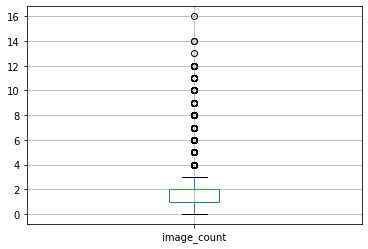

In [53]:
ax = df.loc[:,['image_count']].boxplot()

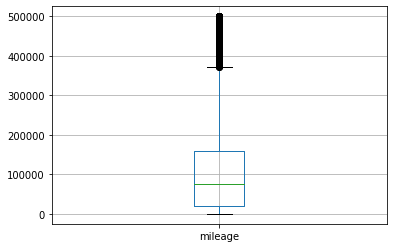

In [54]:
ax = df.loc[:,['mileage']].boxplot()